<a href="https://colab.research.google.com/github/Samwel-93/Week-6-IP-Mchezopesa-Ltd---FIFA-Football-Predictions/blob/main/Moringa_Core_Week_6_IP_Samwel_Omondi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mchezopesa Ltd  - FIFA Football Predictions**

## **Project Expectations:**

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

1. Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
2. Expected flow for the assessment:
   * Perform your EDA
   * Perform any necessary feature engineering 
   * Check of multicollinearity
  * Start building the model
  * Cross-validate the model
  * Compute RMSE
  * Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
3. Perform appropriate regressions on the data including your justification
4. Challenge your solution by providing insights on how you can make improvements.

## **1. Defining the Question**

### a) Specifying the Question

Predict result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly

### b) Defining the Metric for Success

> Model accuracy of 80% and above

### c) Understanding the context 

The men's FIFA World Ranking is a ranking system for men's national teams in association football, currently led by Brazil. 
Since 16 August 2018, the current version of the ranking system has adopted the Elo rating system used in chess and Go.
Rankings of its member associations is updated on a game-by-game basis.
For this project, we are expected to follow the following work flow:

* Perform your EDA
* Perform any necessary feature engineering
* Check of multicollinearity
* Start building the model
* Cross-validate the model
* Compute RMSE
* Creating residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
* Provide recomendation and conclusion

### d) Data Relevance

> Appropriate datasets are provided that contain country FiFa football ranks and results per game played either home or away.

## **2. Reading the Data**

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



In [2]:
# Loading the Datasets
# Fifa Ranking Dataset
#
ranking_df = pd.read_csv('fifa_ranking.csv')

# Results dataset
results_df = pd.read_csv('results.csv')

## **3. Checking the Data**

### **i) Ranking Dataset**

In [3]:
# Determining the no. of records in fifa dataset
#
ranking_df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Columns: 16 entries, rank to rank_date
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB


In [4]:
# Dataset summary of results dataset
#
ranking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [5]:
# Checking the shape of the fifa dataset
#
ranking_df.shape

(57793, 16)

In [6]:
# Previewing the top of fifa dataset
#
ranking_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [7]:
# Previewing the bottom of our dataset
# 
ranking_df.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [8]:
# Checking whether each column has an appropriate datatype
#
ranking_df.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [9]:
# Statistic summary of ranking dataset
#
ranking_df.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


### **ii) Results Dataset**

In [10]:
# Determining the no. of records in results dataset
#
results_df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Columns: 9 entries, date to neutral
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [11]:
# Dataset summary of results dataset
#
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [12]:
# Checking the shape of the results dataset
#
results_df.shape

(40839, 9)

In [13]:
# Checking detailed descriptions of our results dataset
#
results_df.describe

<bound method NDFrame.describe of              date         home_team        away_team  home_score  away_score  \
0      1872-11-30          Scotland          England           0           0   
1      1873-03-08           England         Scotland           4           2   
2      1874-03-07          Scotland          England           2           1   
3      1875-03-06           England         Scotland           2           2   
4      1876-03-04          Scotland          England           3           0   
...           ...               ...              ...         ...         ...   
40834  2019-07-18    American Samoa           Tahiti           8           1   
40835  2019-07-18              Fiji  Solomon Islands           4           4   
40836  2019-07-19           Senegal          Algeria           0           1   
40837  2019-07-19        Tajikistan      North Korea           0           1   
40838  2019-07-20  Papua New Guinea             Fiji           1           1   

     

In [14]:
# Previewing the top of fifa dataset
#
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [15]:
# Previewing the bottom of our dataset
# 
results_df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [16]:
# Checking whether each column has an appropriate datatype
#
results_df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [17]:
# Statistic summary of ranking dataset
#
results_df.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


## 4. External Data Source Validation

 External validation can often be as simple as checking your data against a single number, as we will do here.


Australia 31–0 American Samoa - Largest victory in an international football match. [Link](https://en.wikipedia.org/wiki/Australia_31%E2%80%930_American_Samoa#:~:text=Australia%20set%20a%20world%20record,match%20by%20scoring%2013%20goals.)

## **5. Cleaning the Datasets**

### **i) Ranking Dataset**

In [18]:
# Change rank_date column from 'object' value types to date
#

ranking_df['rank_date'] = pd.to_datetime(ranking_df['rank_date'])


ranking_df.head(2)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [19]:
# Checking for Duplicates
# 
print('Number of duplicates before tyding:' +str(ranking_df.duplicated().sum()))


Number of duplicates before tyding:37


In [20]:
# Dealing with duplicates
#
ranking_df = ranking_df.drop_duplicates()

print('Number of duplicates after tyding:' +str(ranking_df.duplicated().sum()))

Number of duplicates after tyding:0


In [21]:
# Dropping columns that are not relevant from our ranking dataset
#
ranking_df = ranking_df.drop(columns = ['country_abrv', 
                                        'total_points', 
                                        'previous_points', 
                                        'rank_change',
                                        'cur_year_avg', 
                                        'cur_year_avg_weighted', 
                                        'last_year_avg',
                                        'last_year_avg_weighted', 
                                        'two_year_ago_avg', 
                                        'two_year_ago_weighted',
                                        'three_year_ago_avg', 
                                        'three_year_ago_weighted'])
ranking_df.head()



,rank,country_full,confederation,rank_date
0,1,Germany,UEFA,1993-08-08
1,2,Italy,UEFA,1993-08-08
2,3,Switzerland,UEFA,1993-08-08
3,4,Sweden,UEFA,1993-08-08
4,5,Argentina,CONMEBOL,1993-08-08


In [22]:
# statistic summary of current dataframe
ranking_df.describe()

,rank
count,57756.000000
mean,101.618118
std,58.635096
min,1.000000
25%,51.000000
50%,101.000000
75%,152.000000
max,209.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


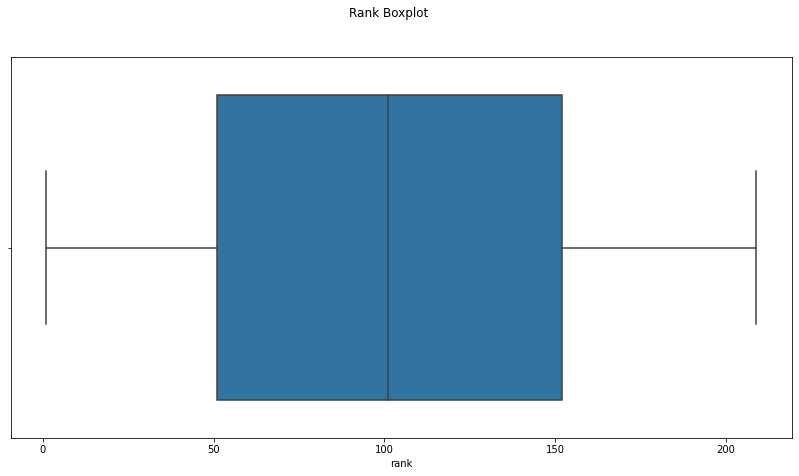

In [23]:
# Checking for Outliers on 'rank' column and Visualization using boxplot
#

rank_fig = plt.figure(figsize = (14, 7)) 
rank_fig.suptitle('Rank Boxplot')
sns.boxplot(ranking_df['rank'])

No outliers in the rank column

In [24]:
# Checking for Anomalies
# Check the country column for uniqueness

ranking_df.country_full.unique()


array(['Germany', 'Italy', 'Switzerland', 'Sweden', 'Argentina',
       'Republic of Ireland', 'Russia', 'Brazil', 'Norway', 'Denmark',
       'England', 'France', 'Spain', 'Mexico', 'RCS', 'Netherlands',
       'Nigeria', 'Belgium', 'Colombia', 'Poland', 'Romania', 'Uruguay',
       'Portugal', 'Cameroon', 'Zambia', 'Egypt', 'Wales', 'USA',
       "Côte d'Ivoire", 'Scotland', 'Tunisia', 'Greece', 'Morocco',
       'Algeria', 'Ecuador', 'Korea Republic', 'Bulgaria', 'Austria',
       'Costa Rica', 'Northern Ireland', 'Honduras', 'Hungary', 'Japan',
       'Saudi Arabia', 'China PR', 'Canada', 'Finland', 'Ghana', 'Chile',
       'Zimbabwe', 'Qatar', 'Australia', 'Iceland', 'IR Iran',
       'United Arab Emirates', 'Yugoslavia', 'Iraq', 'Senegal', 'Bolivia',
       'Kuwait', 'Korea DPR', 'El Salvador', 'Turkey', 'Gabon', 'Guinea',
       'Thailand', 'Paraguay', 'Malawi', 'Israel', 'Peru', 'Zaire',
       'Cyprus', 'Singapore', 'Mali', 'Malaysia', 'Bermuda', 'Niger',
       'Syria', 'Bahr

In [25]:
# Identifying the Missing Data
#
ranking_df.isnull().sum()

rank             0
country_full     0
confederation    0
rank_date        0
dtype: int64

In [26]:
# Dealing with missing data

# As observed above, there are no missing data.

In [27]:
# Renaming the cleaned dataset
#
ranking_cdf = ranking_df

print(ranking_cdf.head())

print('*'*80)

ranking_cdf.shape

   rank country_full confederation  rank_date
0     1      Germany          UEFA 1993-08-08
1     2        Italy          UEFA 1993-08-08
2     3  Switzerland          UEFA 1993-08-08
3     4       Sweden          UEFA 1993-08-08
4     5    Argentina      CONMEBOL 1993-08-08
********************************************************************************


(57756, 4)

### **ii) Results Dataset**

In [28]:
# Results dataset preview
#
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [29]:
# Dropping columns that are not relevant from results dataset
#
results_df = results_df.drop(columns = ['city', 'neutral', 'country'])

In [30]:
# 
#
results_df['date'] = pd.to_datetime(results_df['date'])

print(results_df.dtypes)


date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
dtype: object


In [31]:
# Checking for Duplicates
#
print('Duplicates found before tyding:' +str(results_df.duplicated().sum()))

Duplicates found before tyding:1


In [32]:
# Drop duplicates found
#
results_df = results_df.drop_duplicates()

print('Duplicates found after tyding:' +str(results_df.duplicated().sum()))

Duplicates found after tyding:0


In [33]:
results_df.describe()


,home_score,away_score
count,40838.000000,40838.000000
mean,1.745703,1.188134
std,1.749166,1.405125
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


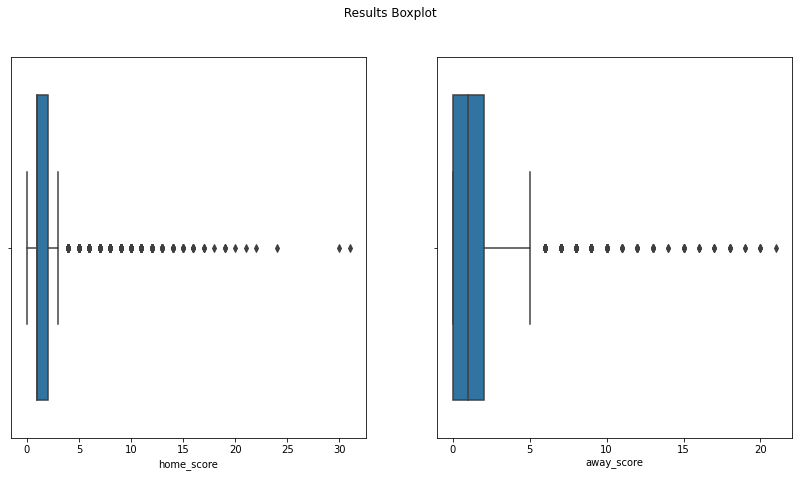

In [34]:
# Checking for Outliers
#
result_fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 7)) 
result_fig.suptitle(' Results Boxplot')
sns.boxplot(results_df['home_score'], ax=ax1)
sns.boxplot(results_df['away_score'], ax=ax2)

A number outliers observed. In this case, we shall not drop the outliers given these are the match scores for these ganes and  we might lose critical data if we drop these values.

In [35]:
# Checking for Anomalies
# Check for unique values under home_team column
results_df.home_team.unique()


array(['Scotland', 'England', 'Wales', 'Northern Ireland',
       'United States', 'Uruguay', 'Austria', 'Hungary', 'Argentina',
       'Belgium', 'France', 'Netherlands', 'Czechoslovakia',
       'Switzerland', 'Sweden', 'Germany', 'Italy', 'Chile', 'Norway',
       'Finland', 'Luxembourg', 'Russia', 'Denmark', 'Catalonia',
       'Basque Country', 'Brazil', 'Japan', 'Paraguay', 'Canada',
       'Estonia', 'Costa Rica', 'Guatemala', 'Spain', 'Brittany',
       'Poland', 'Yugoslavia', 'New Zealand', 'Romania', 'Latvia',
       'Galicia', 'Portugal', 'Andalusia', 'China PR', 'Australia',
       'Lithuania', 'Turkey', 'Central Spain', 'Mexico', 'Aruba', 'Egypt',
       'Haiti', 'Philippines', 'Bulgaria', 'Jamaica', 'Kenya', 'Bolivia',
       'Peru', 'Honduras', 'Guyana', 'Uganda', 'Belarus', 'El Salvador',
       'Barbados', 'Republic of Ireland', 'Trinidad and Tobago', 'Greece',
       'Curaçao', 'Dominica', 'Silesia', 'Guadeloupe', 'Israel',
       'Suriname', 'French Guiana', 'Cuba', 

In [36]:
# Identifying the Missing Data
#
results_df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
dtype: int64

No missing data as shown above

In [37]:
# More data cleaning procedures
# in the tournament column, we need have 2 catergories of whether the match was a Friendly, or Other type
# Define a function

def tournament_type (x):
  if x == 'Friendly':
    return 'Friendly'
  else:
    return 'Other'
    
# we now apply the defined function on tournament column
results_df['tournament'] = results_df['tournament'].apply(lambda x: tournament_type(x))

In [38]:
# Check uniqueness of tournament column
results_df['tournament'].unique()

array(['Friendly', 'Other'], dtype=object)

In [39]:
# cleaned results dataset
results_cdf = results_df

Merging Ranking and Results Datasets

In [40]:
# Preview the 2 datasets
# Ranking dataset
#
print(ranking_cdf.head())



   rank country_full confederation  rank_date
0     1      Germany          UEFA 1993-08-08
1     2        Italy          UEFA 1993-08-08
2     3  Switzerland          UEFA 1993-08-08
3     4       Sweden          UEFA 1993-08-08
4     5    Argentina      CONMEBOL 1993-08-08


In [41]:
# Results dataset
#
print(results_cdf)

            date         home_team        away_team  home_score  away_score  \
0     1872-11-30          Scotland          England           0           0   
1     1873-03-08           England         Scotland           4           2   
2     1874-03-07          Scotland          England           2           1   
3     1875-03-06           England         Scotland           2           2   
4     1876-03-04          Scotland          England           3           0   
...          ...               ...              ...         ...         ...   
40834 2019-07-18    American Samoa           Tahiti           8           1   
40835 2019-07-18              Fiji  Solomon Islands           4           4   
40836 2019-07-19           Senegal          Algeria           0           1   
40837 2019-07-19        Tajikistan      North Korea           0           1   
40838 2019-07-20  Papua New Guinea             Fiji           1           1   

      tournament  
0       Friendly  
1       Frien

## a. Merge by Home Team

In [42]:
# merging the two datasets
home_team_df = pd.merge(results_cdf, ranking_cdf,left_on=['home_team'],right_on=['country_full'], how='left')
home_team_df.head()

,date,home_team,away_team,home_score,away_score,tournament,rank,country_full,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,30.0,Scotland,UEFA,1993-08-08
1,1872-11-30,Scotland,England,0,0,Friendly,28.0,Scotland,UEFA,1993-09-23
2,1872-11-30,Scotland,England,0,0,Friendly,29.0,Scotland,UEFA,1993-10-22
3,1872-11-30,Scotland,England,0,0,Friendly,25.0,Scotland,UEFA,1993-11-19
4,1872-11-30,Scotland,England,0,0,Friendly,24.0,Scotland,UEFA,1993-12-23


In [43]:
# more about the merged dataset
home_team_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10273114 entries, 0 to 10273113
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   date           datetime64[ns]
 1   home_team      object        
 2   away_team      object        
 3   home_score     int64         
 4   away_score     int64         
 5   tournament     object        
 6   rank           float64       
 7   country_full   object        
 8   confederation  object        
 9   rank_date      datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 862.2+ MB


In [44]:
# We then ensure that the home team's match date is less than fifa ranking date 
# An accurate/new fifa ranking usualy comes out after a match has been played

home_team_df = home_team_df [home_team_df.date <= home_team_df.rank_date]
home_team_df.shape

(7276872, 10)

In [45]:
# dropping duplicates 
home_team_df2 = home_team_df.drop_duplicates(['date', 
                                             'home_team', 
                                             'away_team',
                                             'home_score',
                                             'away_score', 
                                             'tournament', 
                                             'confederation'], keep='first')
#
home_team_df2.head()

,date,home_team,away_team,home_score,away_score,tournament,rank,country_full,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,30.0,Scotland,UEFA,1993-08-08
286,1873-03-08,England,Scotland,4,2,Friendly,11.0,England,UEFA,1993-08-08
572,1874-03-07,Scotland,England,2,1,Friendly,30.0,Scotland,UEFA,1993-08-08
858,1875-03-06,England,Scotland,2,2,Friendly,11.0,England,UEFA,1993-08-08
1144,1876-03-04,Scotland,England,3,0,Friendly,30.0,Scotland,UEFA,1993-08-08


In [46]:
# rename rank column to home_team_rank
#
home_team_df2.rename(columns = {'rank':'home_team_rank'}, inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [47]:
# preview dataframe
home_team_df2.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,country_full,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,30.0,Scotland,UEFA,1993-08-08
286,1873-03-08,England,Scotland,4,2,Friendly,11.0,England,UEFA,1993-08-08
572,1874-03-07,Scotland,England,2,1,Friendly,30.0,Scotland,UEFA,1993-08-08
858,1875-03-06,England,Scotland,2,2,Friendly,11.0,England,UEFA,1993-08-08
1144,1876-03-04,Scotland,England,3,0,Friendly,30.0,Scotland,UEFA,1993-08-08


## b. Merge by Away Team

In [48]:
# merging datasets by away team
away_team_df = pd.merge(results_cdf, ranking_cdf,left_on=['away_team'],right_on=['country_full'], how='left')
away_team_df.head()

,date,home_team,away_team,home_score,away_score,tournament,rank,country_full,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,11.0,England,UEFA,1993-08-08
1,1872-11-30,Scotland,England,0,0,Friendly,5.0,England,UEFA,1993-09-23
2,1872-11-30,Scotland,England,0,0,Friendly,10.0,England,UEFA,1993-10-22
3,1872-11-30,Scotland,England,0,0,Friendly,8.0,England,UEFA,1993-11-19
4,1872-11-30,Scotland,England,0,0,Friendly,11.0,England,UEFA,1993-12-23


In [49]:
# We then ensure that the home team's match date is less than fifa ranking date 
# An accurate/new fifa ranking usualy comes out after a match has been played

away_team_df = away_team_df [away_team_df.date <= away_team_df.rank_date]
away_team_df.shape


(7224733, 10)

In [50]:
# dropping duplicates 
away_team_df2 = away_team_df.drop_duplicates(['date', 
                                             'home_team', 
                                             'away_team',
                                             'home_score',
                                             'away_score', 
                                             'tournament', 
                                             'confederation'], keep='first')
#
away_team_df2.head()

,date,home_team,away_team,home_score,away_score,tournament,rank,country_full,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,11.0,England,UEFA,1993-08-08
286,1873-03-08,England,Scotland,4,2,Friendly,30.0,Scotland,UEFA,1993-08-08
572,1874-03-07,Scotland,England,2,1,Friendly,11.0,England,UEFA,1993-08-08
858,1875-03-06,England,Scotland,2,2,Friendly,30.0,Scotland,UEFA,1993-08-08
1144,1876-03-04,Scotland,England,3,0,Friendly,11.0,England,UEFA,1993-08-08


In [51]:
# rename rank column to away_team_rank
#
away_team_df2.rename(columns = {'rank':'away_team_rank'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
# preview dataframe
away_team_df2.head()

,date,home_team,away_team,home_score,away_score,tournament,away_team_rank,country_full,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,11.0,England,UEFA,1993-08-08
286,1873-03-08,England,Scotland,4,2,Friendly,30.0,Scotland,UEFA,1993-08-08
572,1874-03-07,Scotland,England,2,1,Friendly,11.0,England,UEFA,1993-08-08
858,1875-03-06,England,Scotland,2,2,Friendly,30.0,Scotland,UEFA,1993-08-08
1144,1876-03-04,Scotland,England,3,0,Friendly,11.0,England,UEFA,1993-08-08


## c. Merge Away Team & Home Team Datasets

In [53]:
# merge away team and home team datasets
#
merged_df = pd.merge(away_team_df2, home_team_df2 , left_on = ['date'], right_on = ['date'], how = 'left')

merged_df.head()

,date,home_team_x,away_team_x,home_score_x,away_score_x,tournament_x,away_team_rank,country_full_x,confederation_x,rank_date_x,home_team_y,away_team_y,home_score_y,away_score_y,tournament_y,home_team_rank,country_full_y,confederation_y,rank_date_y
0,1872-11-30,Scotland,England,0,0,Friendly,11.0,England,UEFA,1993-08-08,Scotland,England,0.0,0.0,Friendly,30.0,Scotland,UEFA,1993-08-08
1,1873-03-08,England,Scotland,4,2,Friendly,30.0,Scotland,UEFA,1993-08-08,England,Scotland,4.0,2.0,Friendly,11.0,England,UEFA,1993-08-08
2,1874-03-07,Scotland,England,2,1,Friendly,11.0,England,UEFA,1993-08-08,Scotland,England,2.0,1.0,Friendly,30.0,Scotland,UEFA,1993-08-08
3,1875-03-06,England,Scotland,2,2,Friendly,30.0,Scotland,UEFA,1993-08-08,England,Scotland,2.0,2.0,Friendly,11.0,England,UEFA,1993-08-08
4,1876-03-04,Scotland,England,3,0,Friendly,11.0,England,UEFA,1993-08-08,Scotland,England,3.0,0.0,Friendly,30.0,Scotland,UEFA,1993-08-08


In [54]:
# Drop irrelevant columns
#
merged_df2 = merged_df.drop(['rank_date_x', 
                            'home_team_y', 
                            'away_team_y', 
                            'home_score_y', 
                            'away_score_y', 
                            'tournament_y', 
                            'country_full_y', 
                            'confederation_y',
                            'country_full_x',
                            'confederation_x', 
                            'rank_date_y'], axis = 1)
merged_df2.head()

,date,home_team_x,away_team_x,home_score_x,away_score_x,tournament_x,away_team_rank,home_team_rank
0,1872-11-30,Scotland,England,0,0,Friendly,11.0,30.0
1,1873-03-08,England,Scotland,4,2,Friendly,30.0,11.0
2,1874-03-07,Scotland,England,2,1,Friendly,11.0,30.0
3,1875-03-06,England,Scotland,2,2,Friendly,30.0,11.0
4,1876-03-04,Scotland,England,3,0,Friendly,11.0,30.0


In [55]:
# Drop duplicates based on specific columns

merged_df3 = merged_df2.drop_duplicates(subset=['date','home_team_x', 'away_team_x', 'home_score_x', 'away_score_x', 'tournament_x'])
print(merged_df3.duplicated().sum())

0


In [56]:
# Renaming columns
merged_df3.rename(columns={'home_team_x': 'home_team', 
                           'away_team_x': 'away_team', 
                           'away_score_x': 'away_score',
                           'tournament_x': 'tournament',
                           'home_score_x': 'home_score'}, inplace=True)
merged_df3.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,home_team,away_team,home_score,away_score,tournament,away_team_rank,home_team_rank
0,1872-11-30,Scotland,England,0,0,Friendly,11.0,30.0
1,1873-03-08,England,Scotland,4,2,Friendly,30.0,11.0
2,1874-03-07,Scotland,England,2,1,Friendly,11.0,30.0
3,1875-03-06,England,Scotland,2,2,Friendly,30.0,11.0
4,1876-03-04,Scotland,England,3,0,Friendly,11.0,30.0


In [57]:
# check for missing data
merged_df3.isnull().sum()

date                0
home_team           0
away_team           0
home_score          0
away_score          0
tournament          0
away_team_rank      0
home_team_rank    666
dtype: int64

In [58]:
# Dealing with missing data - drop missing values
#
merged_df4 = merged_df3.dropna()

# confirming that missing data have been dropped
merged_df4.isnull().sum()

date              0
home_team         0
away_team         0
home_score        0
away_score        0
tournament        0
away_team_rank    0
home_team_rank    0
dtype: int64

In [59]:
# Drop home team and away team columns

merged_df4 = merged_df4.drop(['home_team',	'away_team'], axis = 1)

In [60]:
# previewing the dataset
merged_df4.head()

,date,home_score,away_score,tournament,away_team_rank,home_team_rank
0,1872-11-30,0,0,Friendly,11.0,30.0
1,1873-03-08,4,2,Friendly,30.0,11.0
2,1874-03-07,2,1,Friendly,11.0,30.0
3,1875-03-06,2,2,Friendly,30.0,11.0
4,1876-03-04,3,0,Friendly,11.0,30.0


In [61]:
# extracting the categorial featuers using boolean mask.
# Categorical boolean mask
categorical_feature_mask = merged_df4.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = merged_df4.columns[categorical_feature_mask].tolist()

In [62]:
# in the tournament column, we lable encode the data to numerical values
# import labelencoder
#
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
merged_df4[categorical_cols] = merged_df4[categorical_cols].apply(lambda col: le.fit_transform(col))
merged_df4[categorical_cols].head()

,tournament
0,0
1,0
2,0
3,0
4,0


In [63]:
# Checking if tournament column is correctly encoded
merged_df4['tournament'].unique()

array([0, 1])

Tournament types are encoded as:
 > Friendly represented by 0 
 > Other represented by 1

In [64]:
# Previewing the final dataset
#

merged_df4.head()

,date,home_score,away_score,tournament,away_team_rank,home_team_rank
0,1872-11-30,0,0,0,11.0,30.0
1,1873-03-08,4,2,0,30.0,11.0
2,1874-03-07,2,1,0,11.0,30.0
3,1875-03-06,2,2,0,30.0,11.0
4,1876-03-04,3,0,0,11.0,30.0


## **6. Exploratory Analysis**

### A. Univariate Summaries

In [89]:
# Statistic summary of the dataset
merged_df4.describe()

,home_score,away_score,tournament,away_team_rank,home_team_rank
count,34823.000000,34823.000000,34823.000000,34823.000000,34823.000000
mean,1.733768,1.173764,0.581053,67.956351,68.857106
std,1.711693,1.381732,0.493394,50.285775,49.781489
min,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,0.000000,0.000000,25.000000,28.000000
50%,1.000000,1.000000,1.000000,58.000000,62.000000
75%,2.000000,2.000000,1.000000,103.000000,101.000000
max,31.000000,20.000000,1.000000,209.000000,207.000000


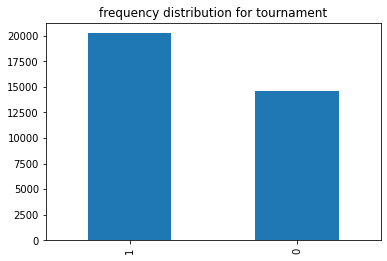

In [66]:
merged_df4['tournament'].value_counts().plot.bar(title='frequency distribution for tournament')

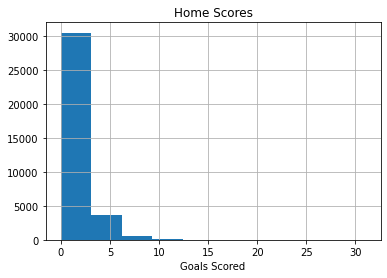

In [67]:
#Plot a histogram to show distribution of home scores
#
merged_df4['home_score'].hist()
plt.xlabel('Goals Scored')
plt.title('Home Scores')

plt.show()

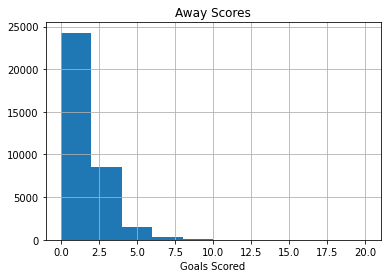

In [68]:
#Plot a histogram to show distribution of away scores
merged_df4['away_score'].hist()
plt.xlabel('Goals Scored')
plt.title('Away Scores')

plt.show()

### B) Bivariate Analysis

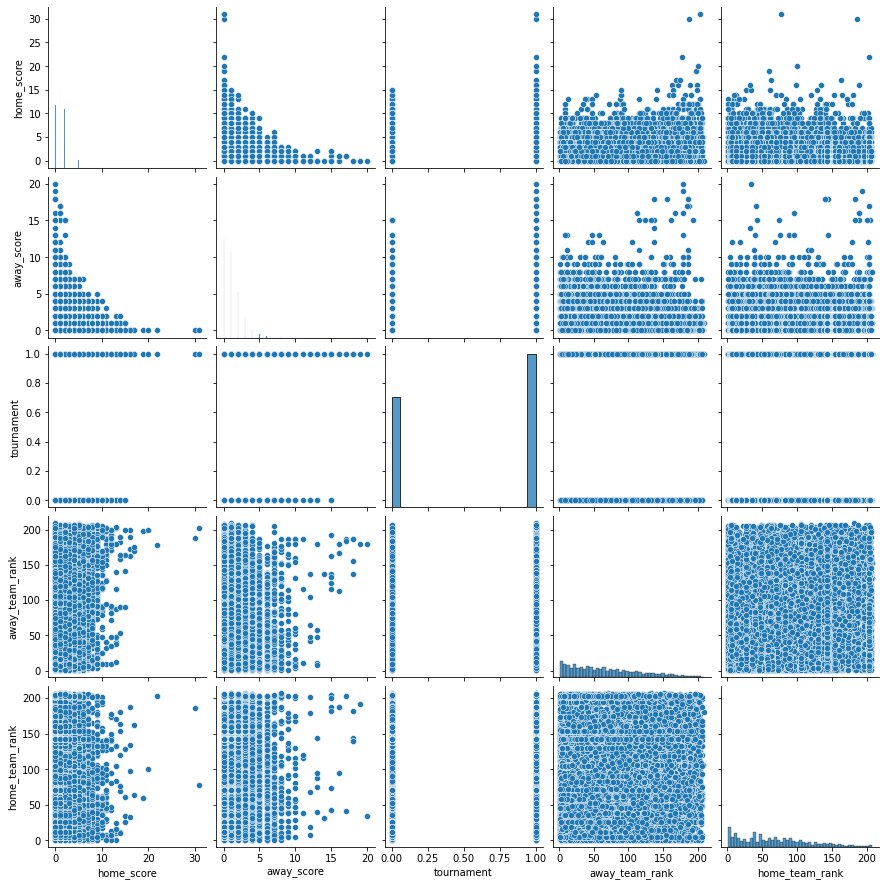

In [69]:
# plot a pair plot
sns.pairplot(merged_df4)

plt.show()

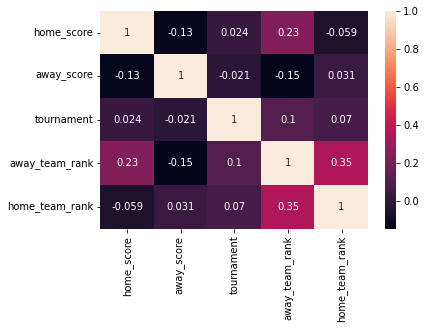

In [70]:
# plot a correlation matrix

sns.heatmap(merged_df4.corr(), annot=True)
plt.show()

### **Polynomial regression**

### Model 1: Predict the home team scores given the home team rank

In [71]:
# We group the dataset by home team ranks and create a new dataframe with the mean of the columns as the
# numerical data that is held in the columns. 


poly_reg_dataset =  merged_df4.groupby(['home_team_rank']).mean()

poly_reg_dataset.head()

,home_score,away_score,tournament,away_team_rank
home_team_rank,,,,
1.0,1.944523,1.017070,0.551920,50.190612
2.0,2.092437,0.963585,0.487395,42.613445
3.0,1.654676,1.187050,0.507194,43.597122
4.0,2.326599,1.313131,0.498316,48.548822
5.0,1.940162,1.117647,0.697769,42.985801


In [72]:
# specify the independent and dependent variables
#
x = poly_reg_dataset.index.values.reshape(-1, 1)
y = poly_reg_dataset['home_score'].values.reshape(-1, 1)

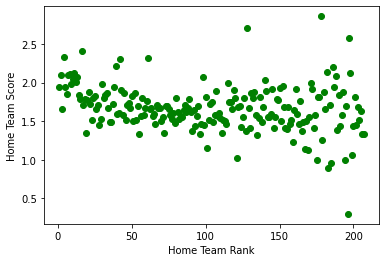

In [73]:
# Visualizing the dataset by plotting a scatter plot


plt.scatter(x, y, color='green') 
plt.xlabel('Home Team Rank')
plt.ylabel('Home Team Score')

plt.show()

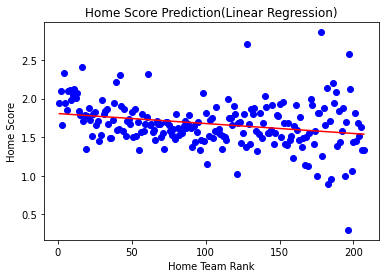

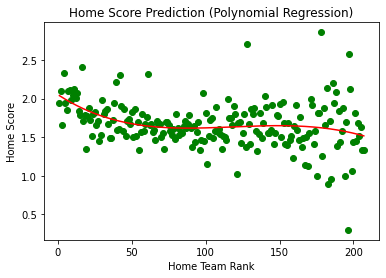

In [74]:
# Split the dataset into train and test sets
x_train, y_train, x_test, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(x,y)

# Visualize the Linear Regression results
plt.scatter(x, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(x, reg_line.predict(x), color='red')
plt.title('Home Score Prediction(Linear Regression)')
plt.xlabel('Home Team Rank')
plt.ylabel('Home Score')
plt.show()


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(x)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(x, y, color='green') # You can put any color you like. This just helps us highlight the data points
plt.plot(x, pol_reg.predict(X_poly), color='red')
plt.title('Home Score Prediction (Polynomial Regression)')
plt.xlabel('Home Team Rank')
plt.ylabel('Home Score')
plt.show()

# pol_reg.predict(poly_reg.fit_transform([[5.5]]))

#### Making Predictions 

In [75]:
# Predict using linear regression
lin_pred = reg_line.predict([[6.5]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)

# We can also get the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg.fit_transform(x))

Linear prediction: 1
Polynomial prediction: 1


### Model 2: Predict the away team scores given the away team rank

In [76]:
poly_reg_dataset =  merged_df4.groupby(['away_team_rank']).mean()

poly_reg_dataset.head()

,home_score,away_score,tournament,home_team_rank
away_team_rank,,,,
1.0,1.226782,2.008639,0.401728,46.974082
2.0,1.111406,1.620690,0.535809,43.936340
3.0,1.846348,1.430730,0.448363,42.068010
4.0,1.350202,1.748988,0.489879,42.180162
5.0,1.271394,1.496333,0.572127,45.061125


In [77]:
# specify the independent and dependent variables
#
x = poly_reg_dataset.index.values.reshape(-1, 1)
y = poly_reg_dataset['away_score'].values.reshape(-1, 1)

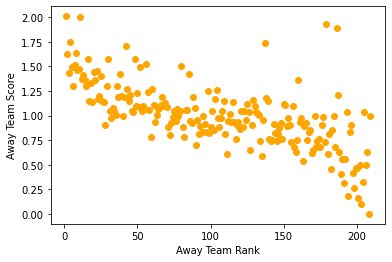

In [78]:
# Visualizing the dataset by plotting a scatter plot
#
plt.scatter(x, y, color='orange') 
plt.xlabel('Away Team Rank')
plt.ylabel('Away Team Score')

plt.show()

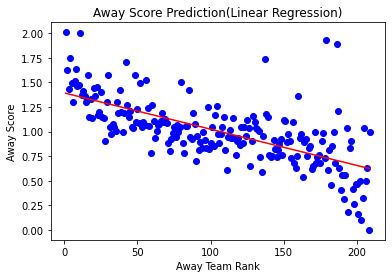

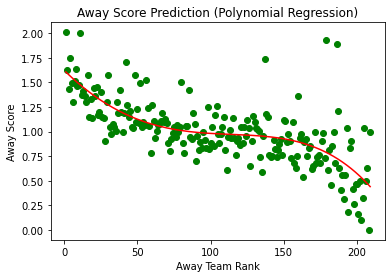

In [79]:
# Split the dataset into train and test sets
x_train, y_train, x_test, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(x,y)

# Visualize the Linear Regression results
plt.scatter(x, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(x, reg_line.predict(x), color='red')
plt.title('Away Score Prediction(Linear Regression)')
plt.xlabel('Away Team Rank')
plt.ylabel('Away Score')
plt.show()


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(x)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(x, y, color='green') # You can put any color you like. This just helps us highlight the data points
plt.plot(x, pol_reg.predict(X_poly), color='red')
plt.title('Away Score Prediction (Polynomial Regression)')
plt.xlabel('Away Team Rank')
plt.ylabel('Away Score')
plt.show()

#### Make Predictions

In [80]:
# Predict using linear regression
lin_pred = reg_line.predict([[80]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[80]]))
print('Polynomial prediction: %d' %poly_pred)


Linear prediction: 1
Polynomial prediction: 1


**Observation**
> The predicted score for away team with an away ranking of 80 is 1 goal. 

## Logistic Regression

In [83]:
# Checking that your dataset size is sufficient

merged_df4.info()

# 34823 records hence we have sufficient data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34823 entries, 0 to 332026
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            34823 non-null  datetime64[ns]
 1   home_score      34823 non-null  int64         
 2   away_score      34823 non-null  int64         
 3   tournament      34823 non-null  int64         
 4   away_team_rank  34823 non-null  float64       
 5   home_team_rank  34823 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 2.9 MB


In [84]:
# adding a  column that shows if a game is a Win (W), Lose (L) or Draw (D) from the home team’s perspective

# define a function that defines the match outcomes
#
def match_outcome (x):
   if x['home_score'] > x['away_score']:
      return 'W'
   if x['home_score'] < x['away_score']:
      return 'L'
   return 'D'

# apply the function
merged_df4['match_outcome'] = merged_df4.apply (lambda x: match_outcome(x), axis=1)

In [85]:
# Splitting our dataset
X = merged_df4[['home_team_rank', 'away_team_rank', 'tournament']]
y = merged_df4["match_outcome"]

# splitting data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [86]:
# Training the Algorithm

# import the desired model, in this this case we are importing logistic regression model
from sklearn.linear_model import LogisticRegression

# instantiate the model
model = LogisticRegression()

# train the algorithm by fitting the model to our training data 
model.fit(X_train, y_train)

LogisticRegression()

In [87]:
# Making Predictions

# obtain the trained model's predictions of the 'match_status' based on X_test 
y_pred = model.predict(X_test) # the y_pred is a numpy array that contains all the predicted values

# create a dataframe that compares the actual output values for X_test with the predicted values
df = pd.DataFrame({'Prediction': y_pred, 'Actual': y_test})

# display top 10 records in the comparison dataframe
df.head()

,Prediction,Actual
33813,W,L
165183,W,W
385,W,D
5265,W,W
306286,W,W


In [91]:
# Evaluating the model

# We import accuracy_score to be used in testing the accuracy of the algorithm 
#
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy: ', accuracy)


Accuracy:  0.5100985928974825


## Conclusion & Recommendation

> The datasets provided were appropriately used in logistic regression modelling however the models' accuracy of approximately 51% which is below the desired accuracy of 80%. This means that our model has not acomplished the set objective.
> To improve this, weneed to explore and identify more features/classifiers which can be trained against our data. 

